Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Gradient boosting: Problem solving


This session will use a dataset of video game sales for games that sold at least 100,000 copies.
Because the dataset is so large, only 1000 randomly sampled rows are included.

| Variable     | Type    | Description                                                                                 |
|:--------------|:---------|:---------------------------------------------------------------------------------------------|
| Rank         | Interval   | Ranking of overall sales                                                                    |
| Name         | Nominal   | The games name                                                                              |
| Platform     | Nominal   | Platform of the games release (i.e. PC,PS4, etc.)                                           |
| Year         | Ratio   | Year of the game's release                                                                  |
| Genre        | Nominal   | Genre of the game                                                                           |
| Publisher    | Nominal   | Publisher of the game                                                                       |
| NA_Sales     | Ratio   | Sales in North America (in millions)                                                        |
| EU_Sales     | Ratio   | Sales in Europe (in millions)                                                               |
| JP_Sales     | Ratio   | Sales in Japan (in millions)                                                                |
| Other_Sales  | Ratio   | Sales in the rest of the world (in millions)                                                |
| Global_Sales | Ratio   | Total worldwide sales.                                                                      |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from <a href="https://www.kaggle.com/gregorut/videogamesales">Kaggle</a>.
</div>
<br>

The goal is to predict `Global_Sales` using the other non-sales variables in the data.


## Load data

Import `pandas` for dataframes.

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs_Python" id="G*NhDz5Jo?CcaJf3rUv}" x="150" y="308"><field name="libraryName">pandas</field><field name="libraryAlias" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load the dataframe with `datasets/vgsales-1000.csv`, using `index_col="Name"`.

In [2]:
dataframe = pd.read_csv('datasets/vgsales-1000.csv', index_col="Name")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="31" y="222"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod_Python" id="4s18v%0iqE%_l@{fLYCo"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="x*dHwc!e,/XY5e1C_ak1"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="tN4Jmaffy/={ZFo;uu;W"><field name="TEXT">datasets/vgsales-1000.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="KPXn,8?jGw0J9Lt==8GZ"><field name="CODE">index_col="Name"</field></block></value></block></value></block></value></block><block type="variables_get" id="yN6MT1B[)Pk)cEECN_YZ" x="31" y="286"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
SCORE International Baja 1000: The Official Game,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
Backyard Wrestling 2: There Goes the Neighborhood,9916,XB,2004.0,Fighting,Eidos Interactive,0.09,0.03,0.00,0.00,0.12
Cardfight!! Vanguard: Ride to Victory,11035,3DS,2013.0,Misc,FuRyu,0.00,0.00,0.09,0.00,0.09
Gold and Glory: The Road to El Dorado,12779,PS,2000.0,Adventure,Ubisoft,0.03,0.02,0.00,0.00,0.06
Miyako,15552,PSP,2010.0,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...
Magicka,14704,PC,2011.0,Role-Playing,Paradox Interactive,0.00,0.02,0.00,0.01,0.03
Sega Ages 2500 Series Vol. 26: Dynamite Deka,15610,PS2,2006.0,Action,Sega,0.00,0.00,0.02,0.00,0.02
Pro Yakyuu Team o Tsukurou!,6986,DC,1999.0,Sports,Sega,0.00,0.00,0.23,0.00,0.23


## Explore data

### Describe and drop missing

Describe the data.

In [3]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod_Python" id="-[lX-}4sT`|#7E(Sti)^" x="78" y="266"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1000.000000,986.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8002.803000,2006.424949,0.303230,0.172770,0.100670,0.054710,0.631570
std,4762.947747,5.826854,0.873913,0.568278,0.390234,0.171543,1.807551
min,7.000000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3890.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.070000
50%,7744.000000,2008.000000,0.080000,0.030000,0.000000,0.010000,0.190000
75%,12055.500000,2010.000000,0.250000,0.120000,0.040000,0.040000,0.512500
max,16598.000000,2016.000000,11.380000,9.230000,6.500000,2.900000,30.010000


-----------
**QUESTION:**

Does the min/mean/max of each variable make sense to you?

**ANSWER: (click here to edit)**

*They make sense. Some sales are zero, but that's probably OK - rounded down to zero.
Looks like the ranks are from the original dataset because they go above 1000.*

--------------------

Try to remove missing values to see if any rows are incomplete.

In [4]:
dataframe = dataframe.dropna()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="31" y="222"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod_Python" id="4s18v%0iqE%_l@{fLYCo"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">dropna</field><data>dataframe:dropna</data></block></value></block><block type="variables_get" id="yN6MT1B[)Pk)cEECN_YZ" x="31" y="286"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
SCORE International Baja 1000: The Official Game,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
Backyard Wrestling 2: There Goes the Neighborhood,9916,XB,2004.0,Fighting,Eidos Interactive,0.09,0.03,0.00,0.00,0.12
Cardfight!! Vanguard: Ride to Victory,11035,3DS,2013.0,Misc,FuRyu,0.00,0.00,0.09,0.00,0.09
Gold and Glory: The Road to El Dorado,12779,PS,2000.0,Adventure,Ubisoft,0.03,0.02,0.00,0.00,0.06
Miyako,15552,PSP,2010.0,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...
Magicka,14704,PC,2011.0,Role-Playing,Paradox Interactive,0.00,0.02,0.00,0.01,0.03
Sega Ages 2500 Series Vol. 26: Dynamite Deka,15610,PS2,2006.0,Action,Sega,0.00,0.00,0.02,0.00,0.02
Pro Yakyuu Team o Tsukurou!,6986,DC,1999.0,Sports,Sega,0.00,0.00,0.23,0.00,0.23


-----------
**QUESTION:**

How many rows had missing values?

**ANSWER: (click here to edit)**

*Because we started with 1000 and now have 986, 14.*

--------------------

### Visualize

Import `plotly.express`.

In [5]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs_Python" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

And create a correlation matrix heatmap.

In [8]:
corr = dataframe.corr()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="vYNmRXjfooN{J0xidPv?">corr</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="o+E~S1:y.,f_naE+oOHM" x="293" y="350"><field name="VAR" id="vYNmRXjfooN{J0xidPv?">corr</field><value name="VALUE"><block type="varDoMethod_Python" id="TGCJO#CXd^qt:[Y0Vx;s"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">corr</field><data>dataframe:corr</data></block></value></block></xml>

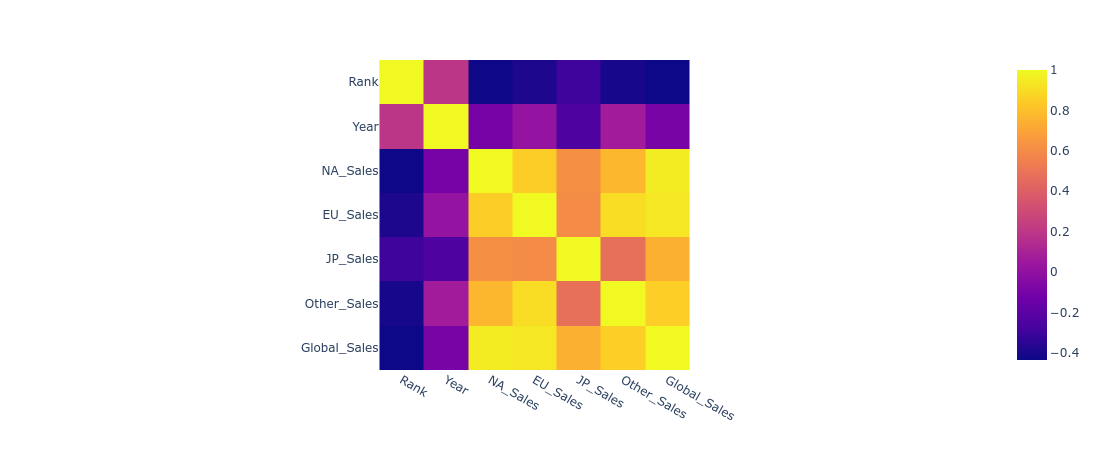

In [9]:
px.imshow(corr, x= (corr.columns), y= (corr.columns))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="vYNmRXjfooN{J0xidPv?">corr</variable></variables><block type="varDoMethod_Python" id="7PkTI5@+A6#C}J7CTmyF" x="39" y="343"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">imshow</field><data>px:imshow</data><value name="INPUT"><block type="lists_create_with" id="g^2EaX(wo6etoMYs:5}O"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="p$)MsgOLW@=FV4_NaFz7"><field name="VAR" id="vYNmRXjfooN{J0xidPv?">corr</field></block></value><value name="ADD1"><block type="valueOutputCodeBlock_Python" id="-k%@k`DgLPjJdCX~~q-E"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty_Python" id="-H3JI@/1,BB%2vpa9z{Q"><field name="VAR" id="vYNmRXjfooN{J0xidPv?">corr</field><field name="MEMBER">columns</field><data>corr:columns</data></block></value></block></value><value name="ADD2"><block type="valueOutputCodeBlock_Python" id="Hi#wAOAODf{-`uYlM*xF"><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty_Python" id="`wgr#ZkO%o(Z=q/~:F@}"><field name="VAR" id="vYNmRXjfooN{J0xidPv?">corr</field><field name="MEMBER">columns</field><data>corr:columns</data></block></value></block></value></block></value></block></xml>

-----------
**QUESTION:**

What's going on with `Rank` and the `*_Sales` variables?

**ANSWER: (click here to edit)**

*Rank appears to be negatively correlated with most things. 
That makes sense because a rank of 1 would have high sales, and a rank of 1000 would have lower sales.
All of the sales seem highly correlated with each other. 
Europe might be doing it's own thing to a small extent.
Basically, we need to remove all other sales data to make a valid model for `Global_Sales`, otherwise we are predicting sales by itself.*

--------------------

Do a scatterplot matrix to see the relationships between these variables.

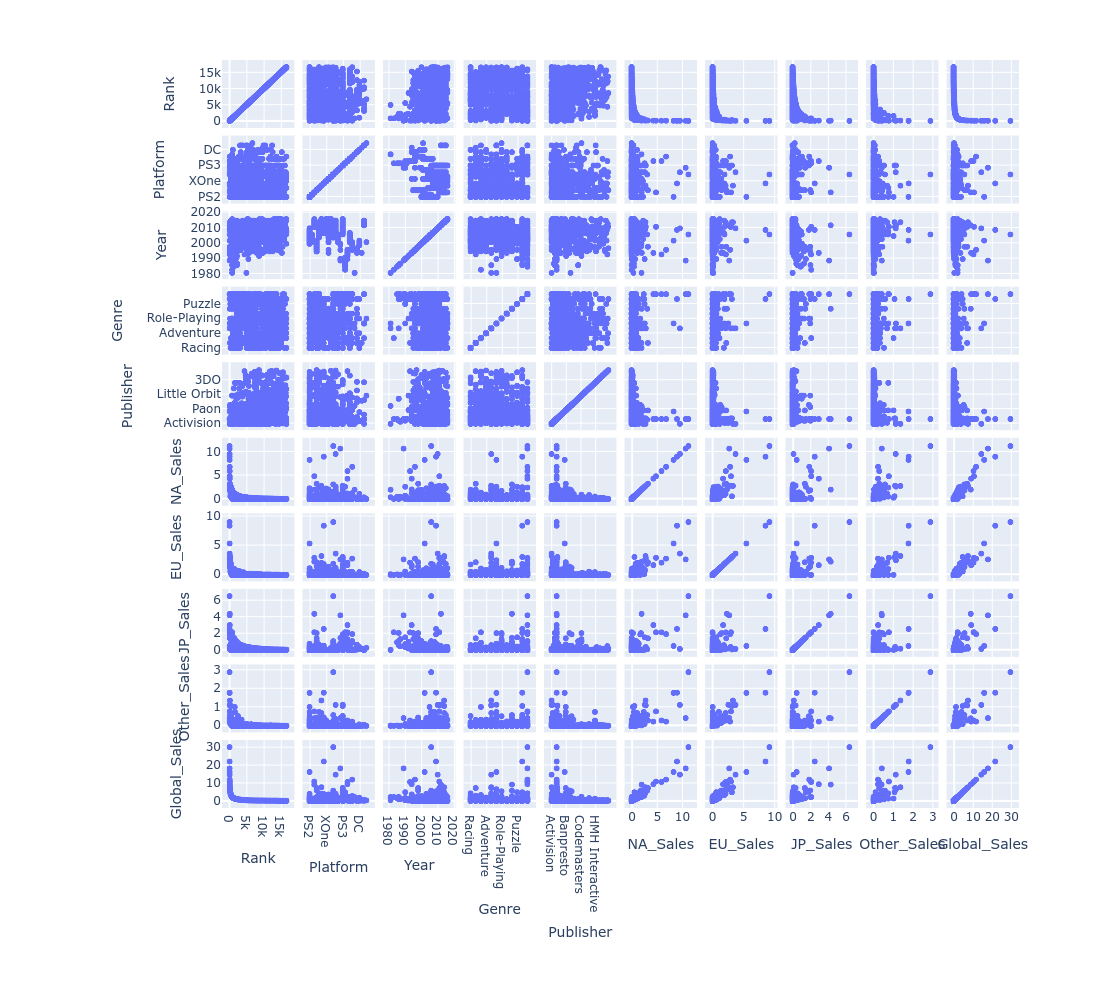

In [10]:
px.scatter_matrix(dataframe, height=1000, width=1000)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod_Python" id="K_Y0K-1=:jF)7/~qEX=/" x="8" y="188"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">scatter_matrix</field><data>px:scatter_matrix</data><value name="INPUT"><block type="lists_create_with" id="*8!u?Wh!8yQ.H:yE~kxG"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="%h3}=^{z3cVOb@/:fg6J"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="]Npu=MiIi:j@dVoiGHgt"><field name="CODE">height=1000</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="8n!ZYE^-6}84#rqNVNl/"><field name="CODE">width=1000</field></block></value></block></value></block></xml>

-----------
**QUESTION:**

Take a look at the scatterplots of the nominal variables against the `Global_Sales`. 
Is there any obvious pattern?

**ANSWER: (click here to edit)**

*Only that sales seem to be increasing over time. 
Also, it looks like some publishers sell more than others, which is obvious*

--------------------

Make a histogram of `Global_Sales` so we can see how it is distributed.

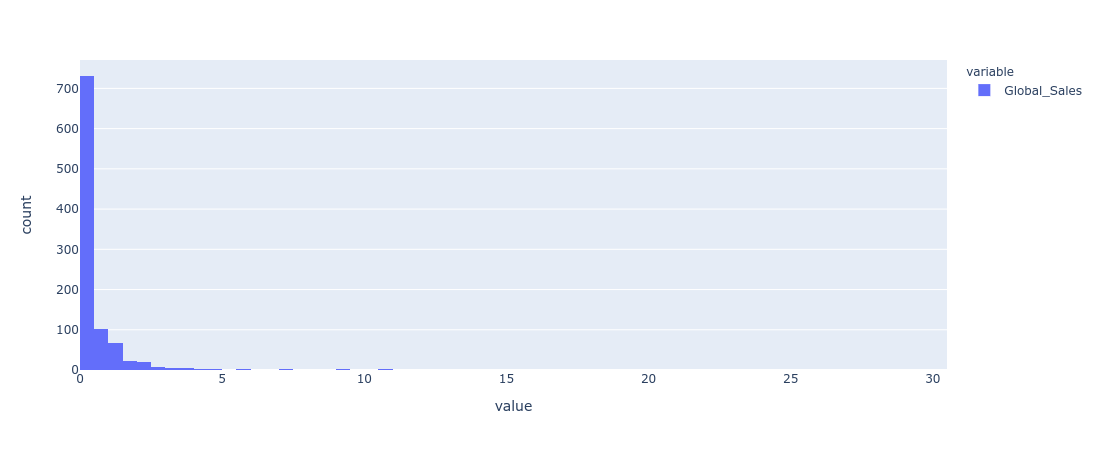

In [11]:
px.histogram(dataframe['Global_Sales'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod_Python" id="f`W@,!`/{w:Mj8xg1c]%" x="-93" y="188"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="INPUT"><block type="lists_create_with" id="PGwpE_*88~]2a_mLEpnr"><mutation items="1"></mutation><value name="ADD0"><block type="indexer_Python" id="T-~9Cv[8P^;NQuvl{!zS"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="text" id="r;i5s[blmRVMONR+41,,"><field name="TEXT">Global_Sales</field></block></value></block></value></block></value></block></xml>

------------------
**QUESTION:**

Do you think we need to transform `Global_Sales` to make it more normal? Why or why not?

**ANSWER: (click here to edit)**

*Yes, definitely. 
It is very strongly skewed - nowhere near normal. If we leave as is, the residuals for a few data points will more strongly affect later boosted models, which is probably not what we want.*

-------------------

## Prepare train/test sets

### X, Y, and dummies

Make a new dataframe called `X` by either dropping all the sales related variables or creating a dataframe with just the columns you want to keep.

In [12]:
X = dataframe.drop(columns=['Rank', 'NA_Sales',        'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="27" y="188"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod_Python" id="k7t38%eJz)@=B8{vW^(u"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="INPUT"><block type="lists_create_with" id="GF+zQWW-#ABEFw$9!#^8"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="fk{P(H^@/_!^1+tw-Hi*"><field name="CODE">columns=['Rank', 'NA_Sales',        'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']</field></block></value></block></value></block></value></block></xml>

Import `numpy` to square root transform `Y`.

In [13]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable></variables><block type="importAs_Python" id="yX*/Q9Ag+}3KvnB:p+X+" x="69" y="125"><field name="libraryName">numpy</field><field name="libraryAlias" id="hxqH|@PJU~wrI]t*tHgd">np</field></block></xml>

Save a dataframe with just `Global_Sales` in `Y`, but use `numpy` to log transform in a freestyle block: `np.sqrt(dataframe[[ "Global_Sales"]])`.

In [14]:
Y = np.sqrt(dataframe[[ "Global_Sales"]])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="wY};U^8vj`~HV$Gd`Ai:" x="27" y="225"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="dummyOutputCodeBlock_Python" id="OgChZ{lc/PpO0;NW_C`{"><field name="CODE">np.sqrt(dataframe[[ "Global_Sales"]])</field></block></value></block></xml>

Replace the nominal variables with dummies and save in `X`.

In [15]:
X = pd.get_dummies(X)

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="N[``Tj{Y-X9-:{:,LZie" x="17" y="246"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod_Python" id="!snzGlMsbL.%p)$iCu~-"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="INPUT"><block type="lists_create_with" id="iiIg%n|P;1H4Uu_(3Eqf"><mutation items="1"></mutation><value name="ADD0"><block type="variables_get" id="!(L^?R}r`]R[RgQMDh{H"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value></block></value></block></value></block><block type="variables_get" id="esj).}av[rq%)lp@R1MD" x="31" y="312"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></xml>

,Year,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SNES,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_10TACLE Studios,Publisher_3DO,...,Publisher_SNK,Publisher_SNK Playmore,Publisher_SSI,Publisher_Sega,Publisher_Seta Corporation,Publisher_Slightly Mad Studios,Publisher_Slitherine Software,Publisher_Sony Computer Entertainment,Publisher_SouthPeak Games,Publisher_Spike,Publisher_Square Enix,Publisher_SquareSoft,Publisher_Starfish,Publisher_Storm City Games,Publisher_Strategy First,Publisher_Swing! Entertainment,Publisher_TDK Mediactive,Publisher_THQ,Publisher_Taito,Publisher_Takara,Publisher_Takara Tomy,Publisher_Take-Two Interactive,Publisher_Team17 Software,Publisher_Tecmo Koei,Publisher_Telltale Games,Publisher_Tomy Corporation,Publisher_UFO Interactive,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Unknown,Publisher_Vic Tokai,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_Yacht Club Games,Publisher_Yeti,Publisher_Yuke's,Publisher_Yumedia,Publisher_Zoo Digital Publishing,Publisher_Zoo Games
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SCORE International Baja 1000: The Official Game,2008.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Backyard Wrestling 2: There Goes the Neighborhood,2004.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cardfight!! Vanguard: Ride to Victory,2013.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gold and Glory: The Road to El Dorado,2000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Miyako,2010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Magicka,2011.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sega Ages 2500 Series Vol. 26: Dynamite Deka,2006.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pro Yakyuu Team o Tsukurou!,1999.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train/test splits

Import `sklearn.model_selection`.

In [19]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs_Python" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

Create the data splits. 
Make sure to use `random_state=1` so we get the same answers.
Don't bother stratifying.

In [20]:
splits = model_selection.train_test_split(X, Y, random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="-102" y="134"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod_Python" id="fUetl3$Ak=SI~T6T5!6c"><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="uUY%r2L/7acQcS/KbQvx"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="jN^;NIVaV%22*W_^|!uK"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="OOZSj;YDm{T6q%{~5?B1"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="Gg*^%q4qIJwc*of,V|rb"><field name="CODE">random_state=1</field></block></value></block></value></block></value></block></xml>

## Fit model

Since the response/target variable is numeric, we need to use a gradient boosting regressor rather than a classifier.

Import `sklearn.ensemble`.

In [21]:
import sklearn.ensemble as ensemble

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="YrOLY99XD^WJhuTK)IFx">ensemble</variable></variables><block type="importAs_Python" id="aH_~S~W~@4D,8tXvn_s6" x="69" y="99"><field name="libraryName">sklearn.ensemble</field><field name="libraryAlias" id="YrOLY99XD^WJhuTK)IFx">ensemble</field></block></xml>

Create the gradient boosting regressor, using `random_state=1` and `subsample=.5`.

In [22]:
gradientBoostingRegressor = ensemble.GradientBoostingRegressor(random_state=1, subsample=.5)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable><variable id="YrOLY99XD^WJhuTK)IFx">ensemble</variable></variables><block type="variables_set" id="Fyby#Z6`$J{8yxJ#gF-6" x="-7" y="251"><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><value name="VALUE"><block type="varCreateObject_Python" id="r3OQ@H/8b[IQZMW^g~*k"><field name="VAR" id="YrOLY99XD^WJhuTK)IFx">ensemble</field><field name="MEMBER">GradientBoostingRegressor</field><data>ensemble:GradientBoostingRegressor</data><value name="INPUT"><block type="lists_create_with" id="q_mcpXAN-Ct9z}XtX,Iy"><mutation items="2"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="x%*#E(klF:]smI~uzw!/"><field name="CODE">random_state=1</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="q/)H5WAz88)5|89@,Ep#"><field name="CODE">subsample=.5</field></block></value></block></value></block></value></block></xml>

`fit` the classifier.

In [23]:
gradientBoostingRegressor.fit(splits[0], np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod_Python" id="-@fm,911cJiCu@jkys%R" x="-94" y="192"><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">fit</field><data>gradientBoostingRegressor:fit</data><value name="INPUT"><block type="lists_create_with" id="qj[~!aNmN}=v;xQ.=$%L"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_Python" id="~1yhID`7cKT3OGJbUA`C"><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="!2;YZV;l:7IzVqStgh^y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></xml>

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Get  and save predictions.

In [24]:
predictionsGradientBoostingRegressor = gradientBoostingRegressor.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="eK*]6c^C8Yxr#Q.djnd9">predictionsGradientBoostingRegressor</variable><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="variables_set" id="FM4[*FDWeN(7%iHSAfQ?" x="-89" y="291"><field name="VAR" id="eK*]6c^C8Yxr#Q.djnd9">predictionsGradientBoostingRegressor</field><value name="VALUE"><block type="varDoMethod_Python" id="iyb},eS,^AG]P+e8|?_w"><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">predict</field><data>gradientBoostingRegressor:predict</data><value name="INPUT"><block type="lists_create_with" id="M~B*Kr~SV)~*y`D4O?Fo"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="fZwSBC7oN~ztuILQKhjb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="j+~A(%x]-W)Rd5k;,l#Z"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="LBFp2#($s_[4DJ8h!O;h"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block></xml>

## Evaluate the model

Because this is regression not classification, you can't use classification metrics like accuracy, precision, recall, and f1.
Instead, you'll use $r^2$.
Some examples are in the `Regression-trees-PS` notebook.

- Get the $r^2$ on the *training* set

- Get the $r^2$ on the *testing* set

In [25]:
print('Training r2:' + str(gradientBoostingRegressor.score(splits[0], splits[2])))
print('Testing r2:' + str(gradientBoostingRegressor.score(splits[1], splits[3])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="~IM}M:,`?~tIB8VB1m^X" x="12" y="213"><value name="TEXT"><shadow type="text" id="{iu!y,x5e@fF1lhBNYKI"><field name="TEXT">abc</field></shadow><block type="text_join" id="SP${6|~=}gsMxiy4{Nq6"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="A9Io`Zzs7V]5]Q{u_YJb"><field name="TEXT">Training r2:</field></block></value><value name="ADD1"><block type="varDoMethod_Python" id="%!VjUHB:+Srn(8bKuAIJ"><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">score</field><data>gradientBoostingRegressor:score</data><value name="INPUT"><block type="lists_create_with" id="iC7s2A5$8x8!{Y4B4zLr"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="d#d#BS{ihm?]_9Sy!`n1"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Hz=Ub^QN}T3,w[Q~vkCp"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id=";~m;0oTRak[R?]rp!IkI"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="G/?J@!@Zg}9|fSK;WcH:"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="V$Rp`[Cu:yN7vsE5_b+w"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="~R]wA!S4a75y!9c.F{9d"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value><next><block type="text_print" id="*@t7(FyRLpt|PBA^:xdf"><value name="TEXT"><shadow type="text"><field name="TEXT">abc</field></shadow><block type="text_join" id="JHr(TR/6hIZm+v4YkSaj"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="k[3)HO`Wqi!BQm7u]q:k"><field name="TEXT">Testing r2:</field></block></value><value name="ADD1"><block type="varDoMethod_Python" id="gvh*_TH#Qq?JsG0(!H7H"><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">score</field><data>gradientBoostingRegressor:score</data><value name="INPUT"><block type="lists_create_with" id="?@MvXE?SU!t[6r79M5UK"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="KuP$Xfs6AC{[]]yfv7#K"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="O0xQb|o_a@gcg_q^*dkq"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="8z!Y`?k*Tm%V=-?noto]"><field name="NUM">2</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id=":4.%?X870n}]58ZYgw*w"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="^lvFCy`9aOfe=fbBnvhb"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Z`D/WBpqeXsh8f(7KbG!"><field name="NUM">4</field></block></value></block></value></block></value></block></value></block></value></block></next></block></xml>

Training r2:0.6265236622548307
Testing r2:-0.08372464930141921


------------------
**QUESTION:**

Compare the *training data performance* to the *testing data performance*. Which is better?
What do these differences tell you?

**ANSWER: (click here to edit)**

*The training data performance is OK, not amazing, and the test data performance is absolutely terrible.
This suggests that perhaps the model is overfit.*

-------------------

## Visualizing

### Feature importance

Visualize feature importance using a bar chart.

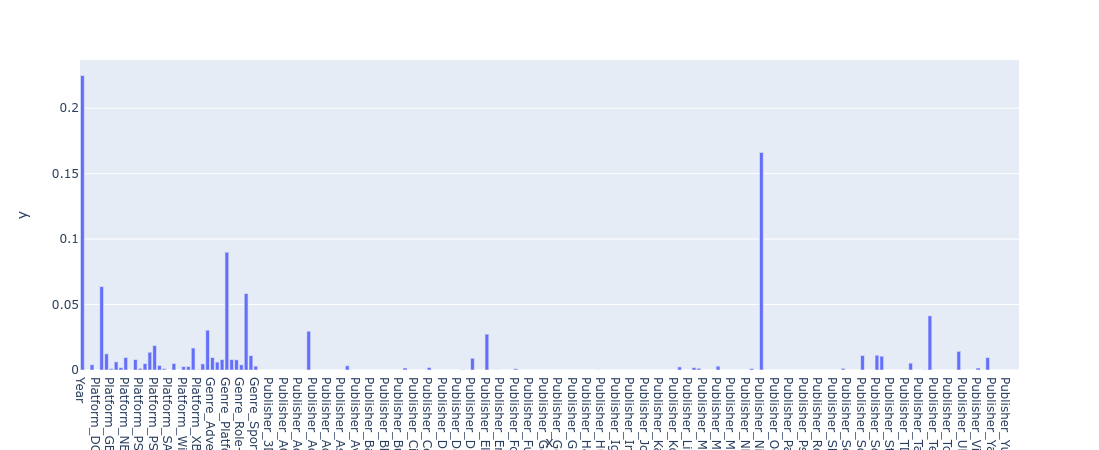

In [26]:
px.bar(x= (X.columns), y= (gradientBoostingRegressor.feature_importances_))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable></variables><block type="varDoMethod_Python" id="!z5]f`%X4n*T=0{-(aa(" x="-39" y="241"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="INPUT"><block type="lists_create_with" id="19y.hEK|(vs{5EtoIY-="><mutation items="2"></mutation><value name="ADD0"><block type="valueOutputCodeBlock_Python" id=")n6vNr^K-pZG`^]=$X)+"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty_Python" id="4)X({}.lRu_v`LhG=:S-"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><field name="MEMBER">columns</field><data>X:columns</data></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock_Python" id="4-@a}eiAHA(@jATo2|_k"><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty_Python" id="^*LArgFS8F;I(9=v`~e^"><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">feature_importances_</field><data>gradientBoostingRegressor:feature_importances_</data></block></value></block></value></block></value></block></xml>

------------------
**QUESTION:**

Hover over the bars to see the corresponding predictor and value. 
What are the most important features?

**ANSWER: (click here to edit)**

*`Year` and `Nintendo` are the most important by far.
`Platform` and `Shooter` games are important, and other publishers `Activision`, `Electronic Arts`, and `Take Two Interactive` are also important.*

-------------------

### Overfit

Use the OOB error to test if the model is overfit.

Import `plotly.graph_objects`

In [27]:
import plotly.graph_objects as go

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/S5EHzNl)/I50f/-KSZQ">go</variable></variables><block type="importAs_Python" id="WV{jUj%W/=n1;iRGdHoh" x="21" y="-12"><field name="libraryName">plotly.graph_objects</field><field name="libraryAlias" id="/S5EHzNl)/I50f/-KSZQ">go</field></block></xml>

Create an empty figure to draw lines on.

In [28]:
fig = go.Figure()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FuH.yx^v|kVlL!174TwM">fig</variable><variable id="/S5EHzNl)/I50f/-KSZQ">go</variable></variables><block type="variables_set" id="/0h?*zn[*5v^D?X%MQok" x="75" y="137"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><value name="VALUE"><block type="varCreateObject_Python" id="ccYq?D6[iomaxyAzJK/^"><field name="VAR" id="/S5EHzNl)/I50f/-KSZQ">go</field><field name="MEMBER">Figure</field><data>go:Figure</data></block></value></block></xml>

And add the two lines, one for training deviance and one for testing deviance.

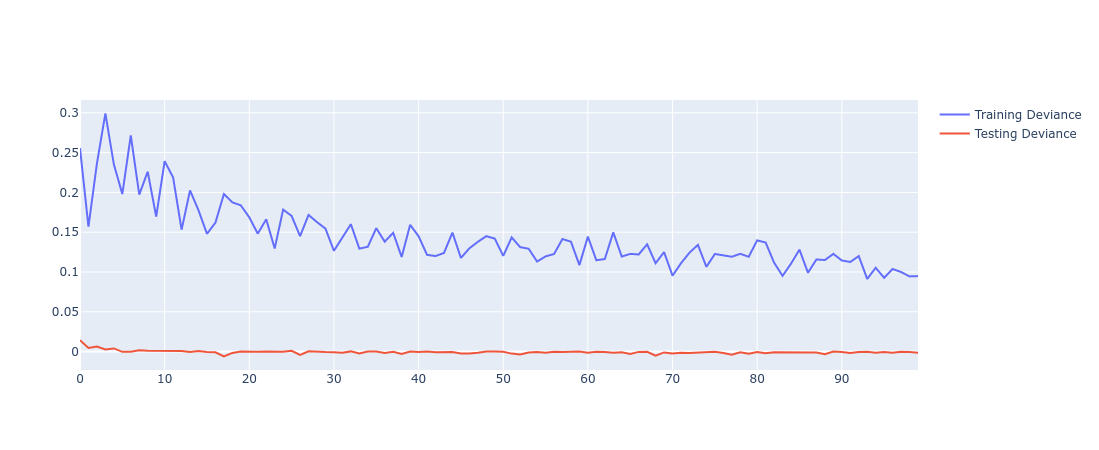

In [29]:
fig.add_scatter(x=np.arange(0,100), y=gradientBoostingRegressor.train_score_, name="Training Deviance")

fig.add_scatter(x=np.arange(0,100), y=gradientBoostingRegressor.oob_improvement_, name="Testing Deviance")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FuH.yx^v|kVlL!174TwM">fig</variable></variables><block type="varDoMethod_Python" id="t+LX0/GT`Qh5{V)D|_Do" x="8" y="108"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="INPUT"><block type="lists_create_with" id="$P.j=XWx|B{Y).~[lezc"><mutation items="3"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="Hwlm,itF~DgkC;2v8pR#"><field name="CODE">x=np.arange(0,100)</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="?Vn@H0+:Y,rip,w8aKf2"><field name="CODE">y=gradientBoostingRegressor.train_score_</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="GJ2OO1n10FnddKV3eGZ)"><field name="CODE">name="Training Deviance"</field></block></value></block></value></block><block type="varDoMethod_Python" id="%th4!T:T(hpvb_^]Me[#" x="15" y="192"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="INPUT"><block type="lists_create_with" id="JUgueIjO?}v?1eij{k0H"><mutation items="3"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="@pg^4a/R,=aqA`%8At`r"><field name="CODE">x=np.arange(0,100)</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id=",KXsqS*+JycIh?{g;`vQ"><field name="CODE">y=gradientBoostingRegressor.oob_improvement_</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="B5jcBj.Fhb9nYG#1H/]z"><field name="CODE">name="Testing Deviance"</field></block></value></block></value></block></xml>

------------------
**QUESTION:**

Do you think it would help our test data performance if we stopped training earlier? Why?

**ANSWER: (click here to edit)**

*Possibly around 4 or 5, thought test data performance seems bad all the way around.*

-------------------

**QUESTION:**

Now that you are familiar with this data and how gradient boosting performed with it, what other models would you try?

**ANSWER: (click here to edit)**

*Given how strong `Year` is, I'd probably consider linear regression using `Year` as a baseline model and then add the genre and publisher features.*

-------------------